In [1]:
# IMPORT REQUIRED LIBRARIES AND FUNCTIONS

'''Data Handling & Linear Algebra'''
import numpy as np
import pandas as pd

'''Visualisation'''
import matplotlib.pyplot as plt
import matplotlib as mpl

'''Manipulating Data and Model Building'''
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten

In [2]:

dataset_train_labels = pd.read_csv('/Users/sharvarisoparkar/Desktop/Deep_learning_folder/DL_project/labels_training.csv')

In [3]:
dataset_train_images='/Users/sharvarisoparkar/Desktop/Deep_learning_folder/DL_project/training/'
dataset_test_images='/Users/sharvarisoparkar/Desktop/Deep_learning_folder/DL_project/testing/'

In [4]:
dataset_train_labels.head()

,id,label
0,0,0
1,1,0
2,2,1
3,3,1
4,4,1


- id are names of the image before tif
- label has two values:
  - 0: No solar panels in the image
  - 1: Solar panels present in the image

In [5]:
# LOADING DATA AND PREPROCESSING
# createing numpy array format
def load_data(dir_data, dir_labels):

    labels_pd = pd.read_csv(dir_labels)                         
    ids = labels_pd.id.values                                   
    data = []   #list                                          
    for identifier in ids:
        fname = dir_data + identifier.astype(str) + '.tif'      # Generating the file name
        image = mpl.image.imread(fname)                        
        data.append(image)                                      
    data = np.array(data)                                       
    labels = labels_pd.label.values                             
    return data, labels                                         # Return the array of data and respective labels

In [6]:
# load train data - time consuming code cell
X, y = load_data(dataset_train_images, '/Users/sharvarisoparkar/Desktop/Deep_learning_folder/DL_project/labels_training.csv')

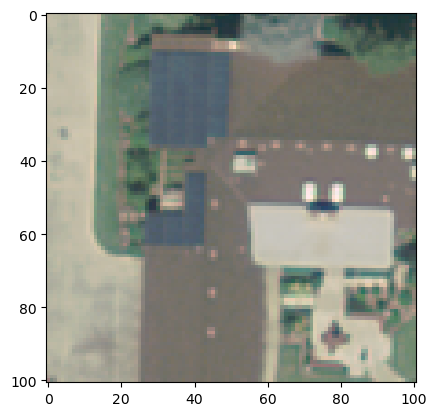

In [15]:
plt.imshow(X[8]) 

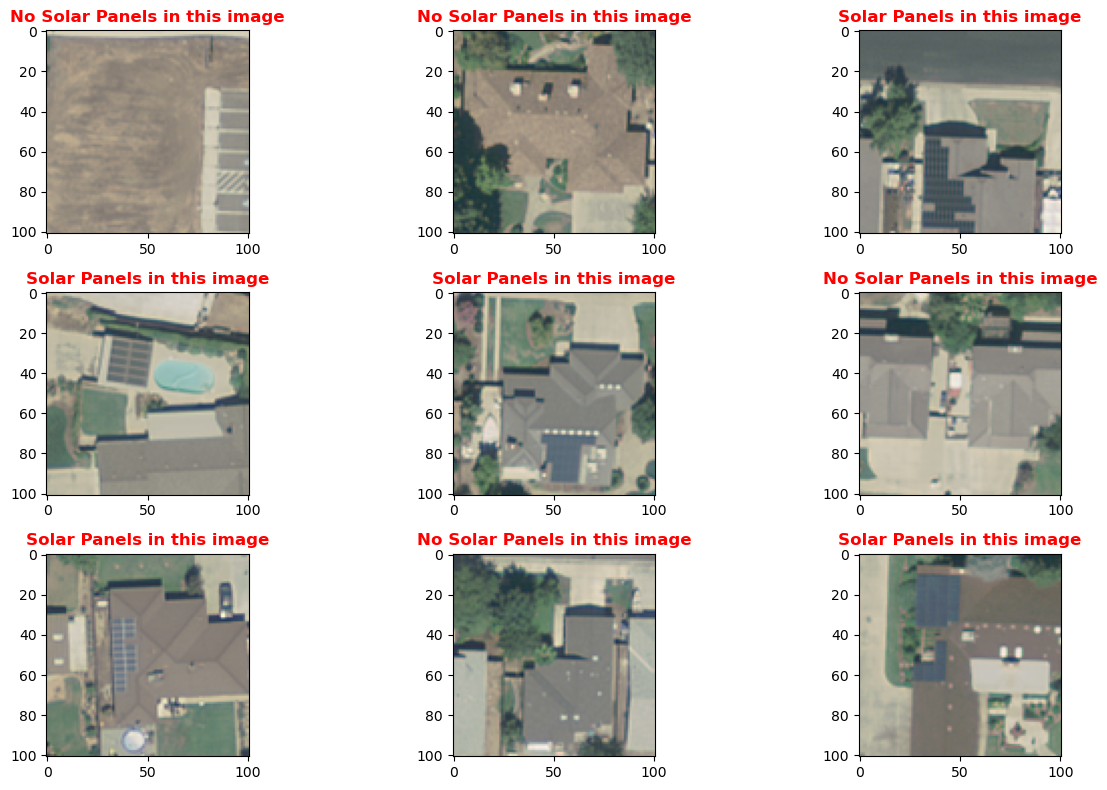

In [7]:
# display the images with and without solar panels
plt.figure(figsize = (13,8))                         
for i in range(9):                                   
  plt.subplot(3, 3, i+1)                             
  plt.imshow(X[i])                                  
  if y[i] == 0:                                      
    title = 'No Solar Panels in this image'         
  else:                                              
    title = 'Solar Panels in this image'             
  plt.title(title, color = 'r', weight = 'bold')     
plt.tight_layout()                                   
plt.show()                                          

In [8]:
# print data shape
print('X shape:\n', X.shape)

X shape:
 (1500, 101, 101, 3)


In [9]:
# check number of samples
print('Distribution of y', np.bincount(y))

Distribution of y [995 505]


#### Normalization:

> Normalize pixel values to a specific range (e.g., between 0 and 1). Normalization helps the model converge faster during training.

In [10]:
# scale pixel values between 0 and 1
X = X / 255.0

In [14]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam
from keras.utils import to_categorical

y_binary = to_categorical(y, num_classes=2)


X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)


def create_cnn_model(input_shape=(101, 101, 3), num_classes=2):
    model = Sequential()


    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))


    model.add(Flatten())


    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='sigmoid'))  

    
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

    return model


cnn_model = create_cnn_model()


history = cnn_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


loss, accuracy = cnn_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Epoch 1/10
38/38 [==============================] - 8s 201ms/step - loss: 0.6549 - accuracy: 0.6650 - val_loss: 0.6697 - val_accuracy: 0.6500
Epoch 2/10
38/38 [==============================] - 7s 179ms/step - loss: 0.6442 - accuracy: 0.6667 - val_loss: 0.6649 - val_accuracy: 0.6500
Epoch 3/10
38/38 [==============================] - 7s 179ms/step - loss: 0.6315 - accuracy: 0.6667 - val_loss: 0.6390 - val_accuracy: 0.6500
Epoch 4/10
38/38 [==============================] - 7s 183ms/step - loss: 0.6289 - accuracy: 0.6367 - val_loss: 0.6288 - val_accuracy: 0.6500
Epoch 5/10
38/38 [==============================] - 7s 179ms/step - loss: 0.5998 - accuracy: 0.6708 - val_loss: 0.5654 - val_accuracy: 0.7367
Epoch 6/10
38/38 [==============================] - 7s 183ms/step - loss: 0.5838 - accuracy: 0.6942 - val_loss: 0.5581 - val_accuracy: 0.7333
Epoch 7/10
38/38 [==============================] - 8s 203ms/step - loss: 0.5698 - accuracy: 0.6983 - val_loss: 0.5488 - val_accuracy: 0.7467
Epoch 